<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Илья, доброго дня! рад опять приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы. Да и вообще - всячески доставать меня:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
В ПУТЬ!<br>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

### Оглавление

* [1. Подготовка данных](#1)
* [ 1.1. Загрузка и изучение данных](#2)
* [ 1.2. Проверка расчета эффективности обогащения](#3)
* [ 1.3. Отстутвующие признаки в тестовых данных](#4)
* [ 1.4. Предобработка данных](#5)
* [2. Анализ данных](#6)
* [ 2.1. Изменение концентрации металлов на различных этапах очистки](#7)
* [ 2.2. Сравнение распределения размеров гранул сырья](#8)
* [ 2.3. Суммарная концентрация веществ на разных стадиях](#9)
* [3. Модель](#10)
* [ 3.1. Функция вычисления итоговой sMAPE](#11)
* [ 3.2. Обучение и оценка моделей](#12)
* [Общий вывод](#13)

<a id='1'></a>

# 1. Подготовка данных

<a id='2'></a>

### 1.1 Загрузка и изучение данных

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from numpy.random import RandomState
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:
# загружаем и просматриваем данные

train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')
datasets = [train_data, test_data, full_data]
for data in datasets:
    display(data, data.info(), data.describe())
    print('-----------------------------------------------------------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.st

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 no

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


-----------------------------------------------------------


Данные по золотодобыче разделены на три выборки: обучающую, тестовую и полную. Обучающая - размером 16860 х 87, тестовая - 5856 х 53, и полная выборка - 22716 х 87. 

Из колонки с временем видно, что получение новых данных происходит раз в час.

В колонках выхода концентрата видно его изменение от 0 до определенной величины для каждого металла. 

В тестовой выборке отсутствуют более 30 признаков из обучающей выборки.

In [3]:
# проверяем, есть ли измерения из тестовой выборки в остальных датасетах
display(test_data.query('date in @train_data.date'))
display(test_data.query('date in @full_data.date'))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


Если сравнить показания по датам, то видно, что все элементы из тестовой выборки присутствуют в полном датасете. Поэтому для сравнения распределений размеров гранул и суммарных концентраций можно взять целиком данные из полного датасета, а затем для построения моделей оставить в тренировочном и тестовом только 53 колонки, бывшие в тестовом изначально

In [4]:
# выводим на экран процент пропусков в каждом датасете

display(train_data.isna().sum(axis=0).sort_values(ascending=False).head(30) / len(train_data) * 100)
display(test_data.isna().sum(axis=0).sort_values(ascending=False) / len(test_data) * 100)
display(full_data.isna().sum(axis=0).sort_values(ascending=False).head(30) / len(full_data) * 100)

rougher.output.recovery                       15.260973
rougher.output.tail_ag                        13.345196
rougher.output.tail_sol                       13.339265
rougher.output.tail_au                        13.339265
secondary_cleaner.output.tail_sol             11.779359
rougher.input.floatbank11_xanthate            11.293001
final.output.recovery                          9.021352
primary_cleaner.input.sulfate                  7.752076
primary_cleaner.input.depressant               7.485172
rougher.calculation.au_pb_ratio                7.366548
rougher.input.floatbank10_sulfate              6.192171
primary_cleaner.input.xanthate                 5.842230
primary_cleaner.output.concentrate_sol         3.772242
rougher.input.floatbank11_sulfate              3.695136
rougher.state.floatbank10_e_air                3.576512
rougher.input.feed_rate                        3.042705
rougher.input.feed_size                        2.473310
final.output.concentrate_sol                   2

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_e_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.st

rougher.output.recovery                     13.730410
rougher.output.tail_ag                      12.048776
rougher.output.tail_sol                     12.044374
rougher.output.tail_au                      12.044374
rougher.input.floatbank11_xanthate           9.935728
secondary_cleaner.output.tail_sol            9.750836
final.output.recovery                        8.641486
rougher.calculation.au_pb_ratio              7.162353
primary_cleaner.input.sulfate                7.083113
primary_cleaner.input.depressant             6.805776
rougher.input.floatbank10_sulfate            5.727241
primary_cleaner.input.xanthate               5.066913
primary_cleaner.output.concentrate_sol       3.512942
rougher.input.floatbank11_sulfate            2.984680
rougher.state.floatbank10_e_air              2.729354
rougher.input.feed_rate                      2.434407
rougher.input.floatbank10_xanthate           2.064624
primary_cleaner.output.concentrate_pb        1.972178
rougher.input.feed_size     

Процент пропусков во всех трех наборах данных весьма велик. Особенно много NaNов в обучающем и полном датасетах, в столбцах с концентрациями веществ на выходе после различных видов обработки - более 10%. Такой процент пропусков можно объяснить простоем оборудования, неработающими датчиками и т.п. техническими причинами.

Сначала кажется наиболее оптимальным заполнение пропусков методом ffill. Однако наши целевые признаки являются производными от некоторых столбцов, и заполнив пропуски в них потобным способом (как впрочем и любым другим), мы внесем сильные искажения в таргет. Равно как и в распределения и соотношения других величин. Поэтому здесь я считаю целессообразным пожертвовать некоторым объемом данных и просто удалить все пропуски.

<a id='3'></a>

### 1.2 Проверка расчета эффективности обогащения

In [5]:
# проверям правильнось вычисления эффективности обогащения (признак rougher.output.recovery)
train_data['recovery_calculated'] = (train_data['rougher.output.concentrate_au'] * (train_data['rougher.input.feed_au'] - train_data['rougher.output.tail_au'])) / (train_data['rougher.input.feed_au'] * (train_data['rougher.output.concentrate_au'] - train_data['rougher.output.tail_au'])) * 100
# сравниваем уже имеющийся столбец с полученным
display(train_data['rougher.output.recovery'])
display(train_data['recovery_calculated'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: recovery_calculated, Length: 16860, dtype: float64

In [6]:
# выводим на экран MAE между вычисленными значениями и табличными
train_data['recovery_mae'] = abs(train_data['recovery_calculated'] - train_data['rougher.output.recovery'])
train_data['recovery_mae'].sort_values(ascending = False).head(50)
train_data['recovery_mae'].mean()

9.444891926100695e-15

Подставив в формулу вычисления recovery следующие значения: 
- С - rougher.output.concentrate_au, 
- F - rougher.input.feed_au, 
- T - rougher.output.tail_au, 

мы получили столбец с вычисленным значением recovery.

Средняя абсолютная ошибка между значениями recovery, взятыми из данных, и вычисленными, оказалась пренебрежимо малой - табличные данные верны.

In [7]:
# удаляем вспомогательные столбцы
train_data = train_data.drop(['recovery_calculated', 'recovery_mae'], axis=1)

<a id='4'></a>

### 1.3 Отстутвующие признаки в тестовых данных

In [8]:
# Пишем отстутсвующие в тестовых данных признаки в отдельный лист

absent_features = []
for column in train_data.columns:
    if column not in test_data.columns:
        absent_features.append(column)
display(absent_features, len(absent_features))

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

34

In [9]:
# Проверяем, присутствуют ли в тестовых данных уникальные колонки

absent_features_train = []
for column in test_data.columns:
    if column not in train_data.columns:
        absent_features_train.append(column)
display(absent_features_train, len(absent_features_train))

[]

0

В тестовых данных отстутствуют 34 колонки. Среди них:
- показатели выхода металлов и солей в концентрате и хвостах, показатель эффективности для флотации и финальные;
- показатели выхода металлов и солей в концентрате и хвостах для первичной обработки;
- показатели выхода металлов и солей в хвостах для вторичной обработки.
- 3 колонки с вычислениями относительно реагентов и концентраций металлов

Проще говоря, в тестовых данных отсутствуют все показатели выхода продукта, в том числе и коэфициенты восстановления. Если убрать все эти признаки из обучающей выборки, мы не сможем построить нужную нам модель. 

Однако, нам могут помочь даты измерений. Измерения, совпадающие по дате с тестовой выборкой, есть в полных данных. Будет разумно взять недостающие столбцы оттуда.

<a id='5'></a>

### 1.4 Предобработка данных

In [10]:
# приводим столбец с датой к формату datetime
for data in datasets:
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%dT%H:%M:%S')
    display(data['date'])

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
16855   2018-08-18 06:59:59
16856   2018-08-18 07:59:59
16857   2018-08-18 08:59:59
16858   2018-08-18 09:59:59
16859   2018-08-18 10:59:59
Name: date, Length: 16860, dtype: datetime64[ns]

0      2016-09-01 00:59:59
1      2016-09-01 01:59:59
2      2016-09-01 02:59:59
3      2016-09-01 03:59:59
4      2016-09-01 04:59:59
               ...        
5851   2017-12-31 19:59:59
5852   2017-12-31 20:59:59
5853   2017-12-31 21:59:59
5854   2017-12-31 22:59:59
5855   2017-12-31 23:59:59
Name: date, Length: 5856, dtype: datetime64[ns]

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
22711   2018-08-18 06:59:59
22712   2018-08-18 07:59:59
22713   2018-08-18 08:59:59
22714   2018-08-18 09:59:59
22715   2018-08-18 10:59:59
Name: date, Length: 22716, dtype: datetime64[ns]

Столбцы с датой во всех выборках приведены к формату datetime

In [11]:
# Берем "расширенный" вариант тестовой выборки из полной

test_data = full_data.query('date in @test_data.date')
display(test_data)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
5522,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
5523,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
5524,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
5525,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17204,2017-12-31 19:59:59,5.000174,9.710255,10.845459,46.400415,68.919891,13.944836,3.373224,13.766506,3.890235,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
17205,2017-12-31 20:59:59,4.956679,9.727962,9.705617,46.657393,68.440582,12.624143,2.974607,14.177795,3.809054,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
17206,2017-12-31 21:59:59,4.779534,9.818943,8.255551,47.337296,67.092759,12.134647,2.843604,13.219960,3.909903,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
17207,2017-12-31 22:59:59,4.472036,9.473869,8.466341,48.258531,68.061186,12.331412,2.889243,12.165999,3.749126,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [12]:
# удаляем пропуски из тестовой и обучающей выборок

train_data = train_data.dropna()
test_data = test_data.dropna()

# проверяем результат

display(train_data.shape, test_data.shape)
display(train_data.info(), test_data.info())

(11017, 87)

(5077, 87)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  11017 non-null object
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant             

None

None

У нас получились две таблицы без пропусков, которые мы будем использовать для сравнения распределений

<a id='6'></a>

# 2. Анализ данных

<a id='7'></a>

### 2.1 Изменение концентрации металлов на различных этапах очистки

In [ ]:
for elem in ['ag', 'au', 'pb']:
    
    full_data['primary_cleaner.output.concentrate_'+elem].plot(figsize=[12,6], grid=True, kind='hist', bins=50, title='Распределения концентраций элементов после первой очистки')      

plt.legend(['Серебро', 'Золото', 'Свинец'])

In [ ]:
for elem in ['ag', 'au', 'pb']:
    
    full_data['final.output.concentrate_'+elem].plot(figsize=[12,6], grid=True, kind='hist', bins=50, title='Распределения концентраций элементов после второй очистки')      

    
plt.legend(['Серебро', 'Золото', 'Свинец'])

Построив график изменения концентрации металлов на различных стадиях переработки, мы можем сказать следующее:
- После флотации. Содержание золота в черновом концентрате - от 15 до 25%, серебра - от 7,5 до 17,5%, cвинца - 4-12%.
- После первичной обработки. Содержание золота в концентрате - от 20 до 40%, серебра - от 4 до 12%, cвинца - 4-14%.
- После вторичной обработки. Содержание золота в концентрате - в среднем 45%, серебра - от 3 до 8%, cвинца - 6-12%.

В целом графики наглядно показывают, что в процессе обработки концентрация золота планомерно повышается, причем после второго этапа очистки график относительно "выравнивается" - большинство значений в коридоре от 40 до 50%. Это можно обьяснить тем, что сырье с изначально разной концентрацией искомого металла в процессе переработки смешивается, фильтруется и на выходе после каждой ступени получается все более равномерный по свойствам продукт. В конце , за пределами нашего проекта, должны получиться одинаковые золотые слитки)

<a id='8'></a>

### 2.2 Сравнение распределения размеров гранул сырья

count    11017.000000
mean        57.215128
std         18.913146
min          9.659576
25%         48.397242
50%         53.843359
75%         61.461770
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5077.000000
mean       55.024715
std        14.761314
min         0.046369
25%        43.850534
50%        50.277786
75%        61.805597
max       190.837404
Name: rougher.input.feed_size, dtype: float64

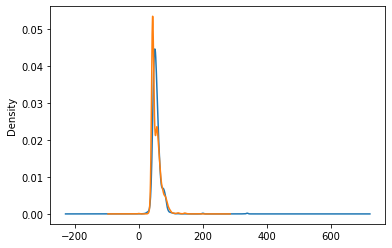

count    11017.000000
mean         7.396036
std          0.575317
min          1.080000
25%          7.030000
50%          7.323334
75%          7.740000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5077.000000
mean        7.290766
std         0.592991
min         5.650000
25%         6.910000
50%         7.260000
75%         7.620000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

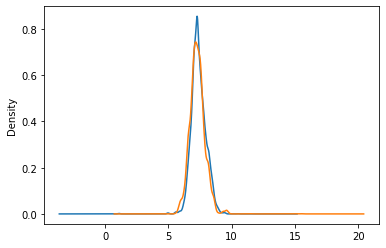

In [14]:
# смотрим средние значения и kde гранул сырья в обучающей и тестовой выборках
# перед флотацией

display(train_data['rougher.input.feed_size'].describe(), test_data['rougher.input.feed_size'].describe())
ax=train_data['rougher.input.feed_size'].plot.kde()
ax=test_data['rougher.input.feed_size'].plot.kde()
plt.show()

# перед первичной очисткой
display(train_data['primary_cleaner.input.feed_size'].describe(), test_data['primary_cleaner.input.feed_size'].describe())
ax=train_data['primary_cleaner.input.feed_size'].plot.kde()
ax=test_data['primary_cleaner.input.feed_size'].plot.kde()
plt.show()

Из графика распределения и описания данных видно, что распределения гранул в обучающей и тестовой выборках примерно одинаковые, следовательно, оценку модели можно будет считать адекватной

<a id='9'></a>

### 2.3 Суммарная концентрация веществ на разных стадиях

In [15]:
# создаем в выборках столбцы с суммарной концентрацией веществ

for data in [train_data, test_data]:
    data['rougher.output.concentrate_sum'] = data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol']
    data['primary_cleaner.output.concentrate_sum'] = data['primary_cleaner.output.concentrate_au'] + data['primary_cleaner.output.concentrate_ag'] + data['primary_cleaner.output.concentrate_pb'] + data['primary_cleaner.output.concentrate_sol']
    data['final.output.concentrate_sum'] = data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + data['final.output.concentrate_pb'] + data['final.output.concentrate_sol']

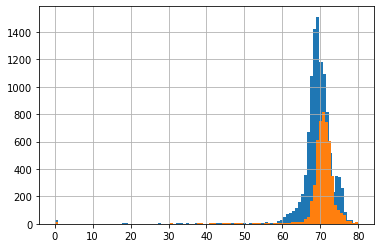

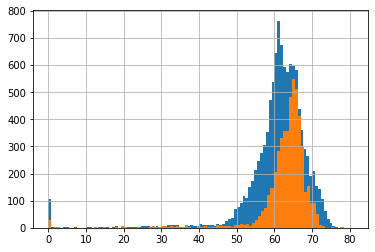

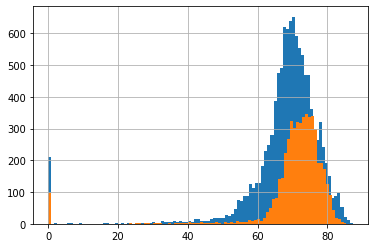

In [16]:
# сравниваем распределения суммарных концентраций 

#ax=train_data['final.output.concentrate_sum'].plot.kde()
ax=train_data['final.output.concentrate_sum'].hist(bins=100)
ax=test_data['final.output.concentrate_sum'].hist(bins=100)
plt.show()

ax=train_data['primary_cleaner.output.concentrate_sum'].hist(bins=100)
ax=test_data['primary_cleaner.output.concentrate_sum'].hist(bins=100)
plt.show()

ax=train_data['rougher.output.concentrate_sum'].hist(bins=100)
ax=test_data['rougher.output.concentrate_sum'].hist(bins=100)
plt.show()

Распределения суммарных концентраций всех веществ также примерно совпадают, однако есть аномалии - резкий пик при нулевой концентрации. Скорее всего, это аномалия в данных, вызванная ошибкой измерения или неработающим оборудованием. Следовательно, эти аномалии можно удалить.

In [17]:
# удаляем аномальные значения из обучающей выборки

df1 = train_data[train_data['final.output.concentrate_sum'] == 0]
train_data = train_data.drop(df1.index)
df2 = train_data[train_data['primary_cleaner.output.concentrate_sum'] == 0]
train_data = train_data.drop(df2.index)
df3 = train_data[train_data['rougher.output.concentrate_sum'] == 0]
train_data = train_data.drop(df3.index)

# удаляем аномальные значения из тестовой выборки

df1 = test_data[test_data['final.output.concentrate_sum'] == 0]
test_data = test_data.drop(df1.index)
df2 = test_data[test_data['primary_cleaner.output.concentrate_sum'] == 0]
test_data = test_data.drop(df2.index)
df3 = test_data[test_data['rougher.output.concentrate_sum'] == 0]
test_data = test_data.drop(df3.index)

# удаляем все вспомогательные колонки

train_data = train_data.drop(['final.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'rougher.output.concentrate_sum'], axis=1)
test_data = test_data.drop(['final.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'rougher.output.concentrate_sum'], axis=1)

С помощью вспомогательных датафреймов мы удалили аномальные данные из тестовой и обучающей выборок, а затем удалили столбцы с суммарной концентрацией веществ - они нам больше не пригодятся.

In [18]:
# убираем из списка "лишних" признаков таргеты

absent_features.remove('rougher.output.recovery')
absent_features.remove('final.output.recovery')

# оставляем в тестовой и обучающей выборках только признаки, бывшие изначально в тестовой

test_data = test_data.drop(absent_features, axis=1)
train_data = train_data.drop(absent_features, axis=1)

# проверяем результат

display(train_data.shape, test_data.shape)

(10737, 55)

(4942, 55)

Для дальнейшего построения моделей мы оставили в обеих выборках только признаки, бывшие в тестовой выборке изначнально. Также в тестовой выборке теперь есть целевые признаки

<a id='10'></a>

# 3. Модель

<a id='11'></a>

### 3.1 Функция вычисления итоговой sMAPE

In [19]:
# пишем функцию для sMAPE отдельного этапа

def smape(A, F):
    """
    A - actual value, F- forecast value
    """
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# пишем функцию для итоговой sMAPE

def final_smape(rough_smape, final_smape):
    
    total_smape = 0.25 * rough_smape + 0.75 * final_smape
    
    return total_smape

По формуле, данной в описании, написана функция для вычисления sMAPE (symmetric mean absolute error) - черновой, финальной и итоговой.

<a id='12'></a>

### 3.2 Обучение и оценка моделей

In [20]:
# Делаем выборки для расчета черновой sMAPE

X_train_rough = train_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_train_rough = train_data['rougher.output.recovery']
X_test_rough = test_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_test_rough = test_data['rougher.output.recovery']

# Делаем выборки для расчета финальной sMAPE

X_train_final = train_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_train_final = train_data['final.output.recovery']
X_test_final = test_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
y_test_final = test_data['final.output.recovery']

# проверяем размер выборок

print(X_train_rough.shape, y_train_rough.shape)
print(X_test_rough.shape, y_test_rough.shape)
print()
print(X_train_rough.shape, y_train_rough.shape)
print(X_test_rough.shape, y_test_rough.shape)

(10737, 52) (10737,)
(4942, 52) (4942,)

(10737, 52) (10737,)
(4942, 52) (4942,)


Обучающая и тестовая выборка разбиты на 4 части - по две на каждый целевой признак.

In [21]:
# пишем функцию для оценки качества модели кросс-валидацией

my_scorer = make_scorer(smape, greater_is_better=True)

Для оценки качества модели кросс-валидацией пригодится функция make_scorer. Она принимает на вход нашу функцию для вычисления sMAPE (вычислим сначала чистовую и черновую отдельно). Сделав ее параметром кросс-валидации, на выходе получим массив из необходимых нам метрик, по которому вычислим среднее.

In [22]:
# вычисляем метрики линейной модели
# для черновой обработки

model_rough = LinearRegression().fit(X_train_rough, y_train_rough)
score = cross_val_score(model_rough, X_train_rough, y_train_rough, cv=5, scoring=my_scorer)
rough_score = sum(score)/5

# для чистовой обработки

model_final = LinearRegression().fit(X_train_final, y_train_final)
score = cross_val_score(model_final, X_train_final, y_train_final, cv=5, scoring=my_scorer)
final_score = sum(score)/5

total_score = final_smape(rough_score, final_score)

print('Для линейной регрессии итоговая метрика sMAPE равна {:.2f}'.format(total_score))

Для линейной регрессии итоговая метрика sMAPE равна 8.30


In [23]:
# пишем функцию для модели решающего дерева
def decision_tree_model(X, y):
# обучаем модель
    model = DecisionTreeRegressor(random_state=12345).fit(X, y)
    # задаем диапазон гиперпараметров
    dt_params = {'max_depth': range(1,15),
                  'min_samples_split': range(2,8),
                  'min_samples_leaf': range(1,8)
                  }
    # используя RandomSearch, подбираем гиперпараметры
    dt_cv = RandomizedSearchCV(model, dt_params, random_state=12345)
    dt_cv.fit(X, y)
    param = dt_cv.best_params_
    # обучаем модель с лучшими гиперпараметрами
    model = DecisionTreeRegressor(max_depth=param['max_depth'], 
                                  min_samples_split=param['min_samples_split'], 
                                  min_samples_leaf=param['min_samples_leaf'],
                                  random_state=12345
                                  ).fit(X, y)

    score = cross_val_score(model, X, y, cv=5, scoring=my_scorer)
    score = sum(score)/5
    return score

# применяем модель для черновой и финальной обработки
rough_score = decision_tree_model(X_train_rough, y_train_rough)
final_score = decision_tree_model(X_train_final, y_train_final)

# итоговая метрика
total_score = final_smape(rough_score, final_score)

print('Для решающего дерева итоговая метрика sMAPE равна {:.2f}'.format(total_score))

Для решающего дерева итоговая метрика sMAPE равна 7.81


In [24]:
# создаем функцию для модели случайного леса
def random_forest_model(X, y):
    # обучаем модель
    model = RandomForestRegressor(random_state=12345).fit(X, y)
    # задаем диапазон гиперпараметров
    rf_params = {'n_estimators': range(1,31,5),
                  'max_depth': range(1,6),
                  'min_samples_split': range(2,6),
                  'min_samples_leaf': range(1,5),
                  'n_jobs': [-1]
                  }
    # используя RandomSearch, подбираем гиперпараметры
    rf_cv = RandomizedSearchCV(model, rf_params, random_state=12345)
    rf_cv.fit(X, y)
    param = rf_cv.best_params_
    # обучаем модель с лучшими гиперпараметрами
    model = RandomForestRegressor(n_estimators=param['n_estimators'], 
                                  min_samples_split=param['min_samples_split'], 
                                  min_samples_leaf=param['min_samples_leaf'],
                                  random_state=12345
                                  ).fit(X, y)

    score = cross_val_score(model, X, y, cv=5, scoring=my_scorer)
    score = sum(score)/5
    return score


# применяем модель для черновой и финальной обработки
rough_score = random_forest_model(X_train_rough, y_train_rough)
final_score = random_forest_model(X_train_final, y_train_final)       
    
# итоговая метрика
total_score = final_smape(rough_score, final_score)

print('Для случайного леса итоговая метрика sMAPE равна {:.2f}'.format(total_score))

Для случайного леса итоговая метрика sMAPE равна 8.72


Наилучшей по метрике sMAPE моделью для нас оказалась модель решающего дерева. Её и проверим на тестовых данных. 

In [ ]:
# вычисляем метрики решающего дерева для тестовой выборки
# для черновой обработки

# обучаем модель
model_rough = DecisionTreeRegressor(random_state=12345).fit(X_train_rough, y_train_rough)
# задаем диапазон гиперпараметров
dt_params = {'max_depth': range(1,15),
              'min_samples_split': range(2,8),
              'min_samples_leaf': range(1,8)
              }
# используя RandomSearch, подбираем гиперпараметры
dt_cv = RandomizedSearchCV(model_rough, dt_params, random_state=12345)
dt_cv.fit(X_train_rough, y_train_rough)
param = dt_cv.best_params_
# обучаем модель с лучшими гиперпараметрами
model_rough = DecisionTreeRegressor(max_depth=param['max_depth'], 
                              min_samples_split=param['min_samples_split'], 
                              min_samples_leaf=param['min_samples_leaf'],
                              random_state=12345
                              ).fit(X_train_rough, y_train_rough)

score = cross_val_score(model_rough, X_test_rough, y_test_rough, cv=500, scoring=my_scorer)

rough_score = sum(score)/500

# то же для чистовой обработки

model_final = DecisionTreeRegressor(random_state=12345).fit(X_train_final, y_train_final)
dt_params = {'max_depth': range(1,15),
              'min_samples_split': range(2,8),
              'min_samples_leaf': range(1,8)
              }
dt_cv = RandomizedSearchCV(model_final, dt_params, random_state=12345)
dt_cv.fit(X_train_final, y_train_final)
param = dt_cv.best_params_

model_final = DecisionTreeRegressor(max_depth=param['max_depth'], 
                              min_samples_split=param['min_samples_split'], 
                              min_samples_leaf=param['min_samples_leaf'],
                              random_state=12345
                              ).fit(X_train_final, y_train_final)

#predict_final = model_final.predict(X_test_final)
score = cross_val_score(model_final, X_test_final, y_test_final, cv=500, scoring=my_scorer)

final_score = sum(score)/500

total_score = final_smape(rough_score, final_score)

print('Для решающего дерева на тестовой выборке итоговая метрика sMAPE равна {:.2f}'.format(total_score))

# метрика константной модели
median_value_rough = pd.Series(model_rough.predict(X_test_rough)).median()
median_value_final = pd.Series(model_final.predict(X_test_final)).median()

smape_const_rough = smape(y_test_rough, median_value_rough)
smape_const_final = smape(y_test_final, median_value_final)
smape_const_total = final_smape(smape_const_rough, smape_const_final)

print('sMAPE константной модели : {:.2f}'.format(smape_const_total))

### Вывод

- Обработка пропусков. В случаях, когда величины признаков находятся в прямой зависимости или определенных соотношениях друг к другу (как например, концентрации веществ), заполнение пропусков статистическими методами может привести к возникновению аномалий (например, суммарной концентрации >100%) и последующему их удалению, что будет нивелировать работу по их заполнению, и вдобавок вносить искажения в модель. Поэтому в таких случаях, как и в нашем, более разумным мне кажется их удалять. 
- Сравнение концентраций все равно выявило аномалии (нулевые концентрации), которые были удалены. Причина их - скорее всего в неисправности оборудования. В итоге после предобработки и очистки объем данных сократился примерно на 20%, что не критично для качества модели.
- Для построения модели так же пришлось "обрезать" 30 признаков, бывших в изначальных данных.
- Для подбора гиперпараметров в моделях был использован метод RandomSearch, который выгодно отличается от GridSearch по времени подбора, и в принципе дает схожий результат.

Наилучшее качество показала модель решающего дерева - sMAPE равная 6.38. Это значит, что в среднем коэфициенты восстановления будут предсказываться ею с погрешностью менее 10% - что, на мой взгляд, весьма приемлемый результат)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Илья,  <br>
очередную интересную работу ты провел.<br>
Понятно, логично, без напряжения. С хорошей модельной частью.<br>
Метрика - достаточно низкая.<br>
вот только не понятно насколько))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
(в формулу метрики подставить предсказанные медианные значения target_train). Получится, например, 12%. Тогда ОК. Наша модель даёт в среднем -4% выгоды<br>
Правда тут надо будет смотреть, всё-таки, разброс предсказаний - стандартное отклонение..ну это другая исотрия.<br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!
</b></font>

Спасибо за ревью!)

Добавил константную модель в расчет, получилась смэйп 7.32 - получилось что наша модель работает хоть и лучше константной, но лишь на 15%.

Причем попробовав различные методы, как заполнение пропусков ffill или подбор гиперпараметров через grid search, особого улучшения метрики достичь не удалось (а поиск по сетке к тому же работает намного дольше рандомного). Радикально, до 1.5-2.7, метрика улучшается только при построении модели с 85 признаками, что противоречит условиям нашей задачи и не будет работать в реальном техпроцессе.


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2 (09/09/2020)</b></u></font><br />
<font color='green'>
Илья!<br>
Спасибо за доработку)<br>
    
Действительно, наша модель не далеко оторвалась от константной<br>
(тут такая задача. Хотя,  нужно учесть, что когда дело касается золота - каждый грамм...., как говорится)).<br><br>

Техническая сторона у тебя уже имеет определённый уровень.<br>
А если будет какая нехватка - сейчас можно в "великом разуме" найти всякого-всякого.<br>

Думаю, что самое тут время поразмышлять, а что ещё для дальнейшего улучшения качества моделирования возможно сделать?<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))

Спасибо за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке